# <img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Rehearsal Data Metrics Notebook</b> <br>
Contact author: Erin Howard<br>
Last verified to run: January 2, 2024<br>
LSST Science Piplines version: w_2024_16<br>
Container Size: Medium <br>

# DM-43908: ApPipe on Rehearsal Data

## Analysis Summary

* 

## Table of Contents

1. [Imports, Helper Functions, and Loading](#section_1)
2. [Timing](#section_2)
3. [Analysis Metrics](#section_3)

## 1. <a id="section_1">Imports, Helper Functions, and Loading</a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import re
import glob

%matplotlib widget

import lsst.daf.butler as dafButler

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.set_loglevel('WARNING')

### Loading Data

In [2]:
submitPath = '/sdf/data/rubin/user/elhoward/repo-main-logs/DM-43098/submit/u/elhoward/DM-43098/LSSTComCamSim/20240419T233136Z/jobs'
collection = f'u/elhoward/DM-43098/LSSTComCamSim'

repo = '/repo/embargo'
butler = dafButler.Butler(repo, collections = collection)

## <a id="section_2">2. Timing</a>

### Collecting timing data

In [3]:
jobs = ['isr','calibrateImage','initialPviCore','retrieveTemplate','subtractImages',
        'detectAndMeasure','diffimTaskCore','filterDiaSrcCat','transformDiaSrcCat',
        'diaPipe','analyzeTrailedDiaSrcCore','analyzeAssocDiaSrcCore']

In [4]:
timingTable = pd.DataFrame(columns=['job', 'timing'])
timingTable
for job in jobs:
    jobPath = submitPath + "/" + job
    os.chdir(f"{jobPath}")
    timing = []
    i = 0
    for file in glob.glob("*/*.err"):
        filename = jobPath + '/' + file
        textfile = open(filename, 'r')
        errText = textfile.read()
        textfile.close()
        try:
            time = re.findall(r"took (.*?) second",errText)[0]
            timing.append(float(time))
        except:
            i += 1
    if i > 0:
        print(f"There were {i} error files that did not have timing data in {job}.")
    jobTiming = {'job': job, 'timing': timing}
    timingTable.loc[len(timingTable)] = jobTiming

There were 8535 error files that did not have timing data in diaPipe.


### Timing Histograms

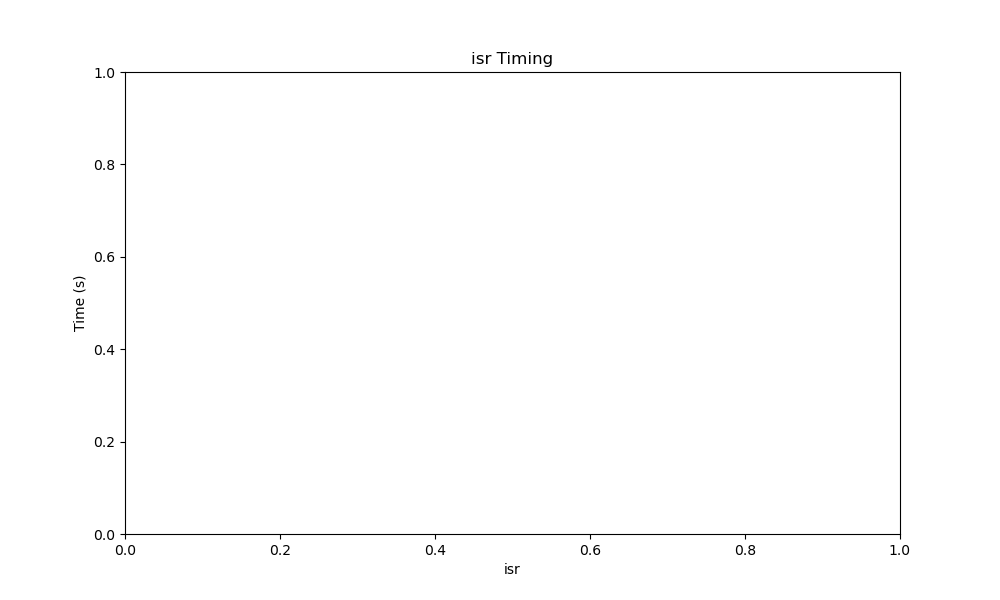

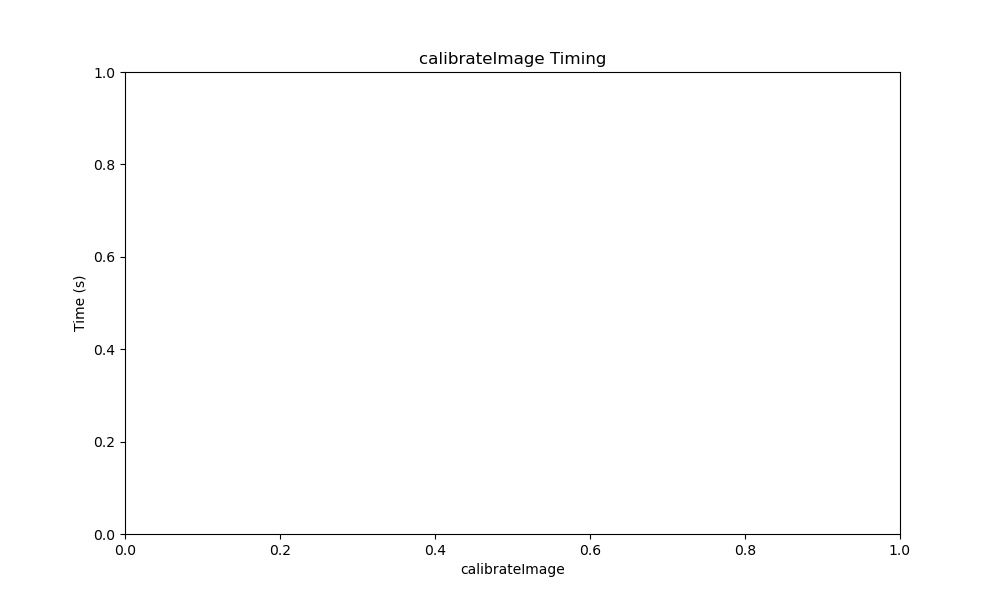

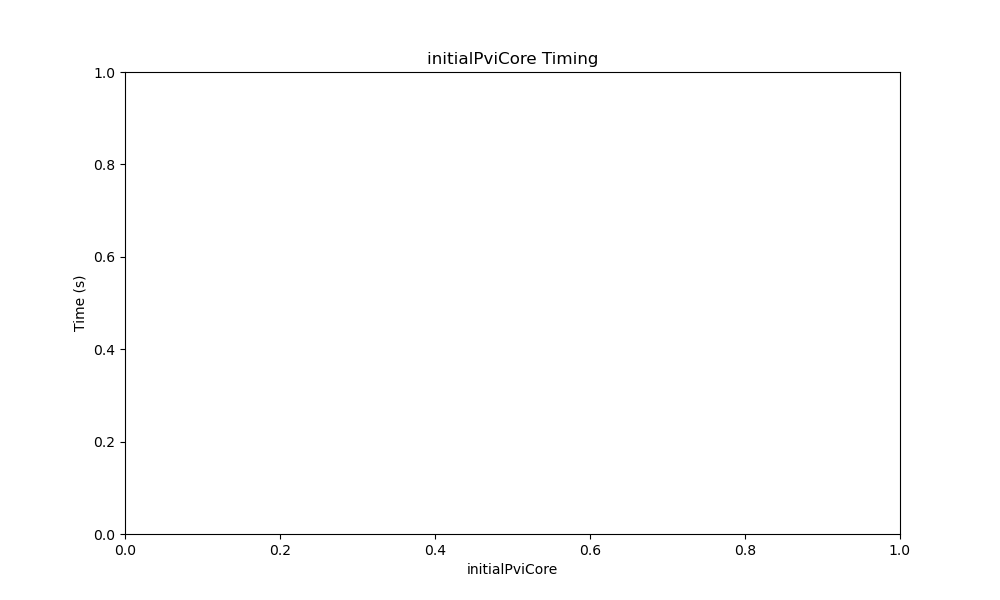

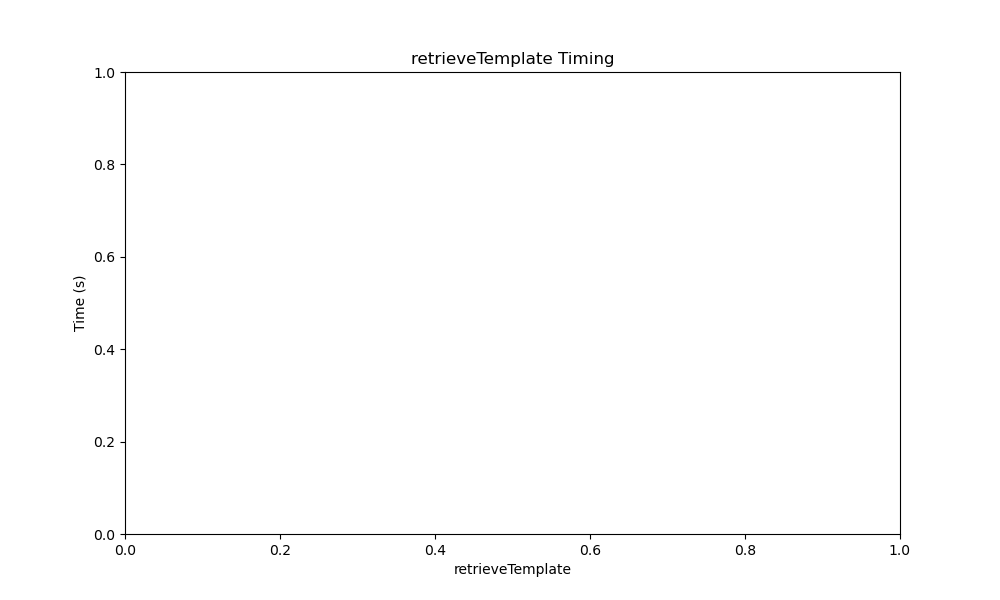

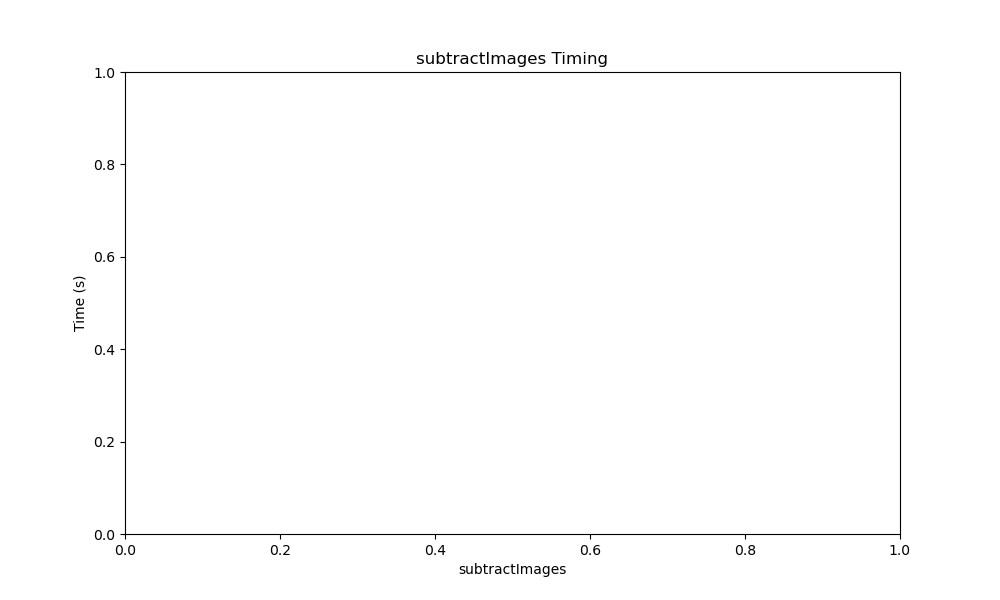

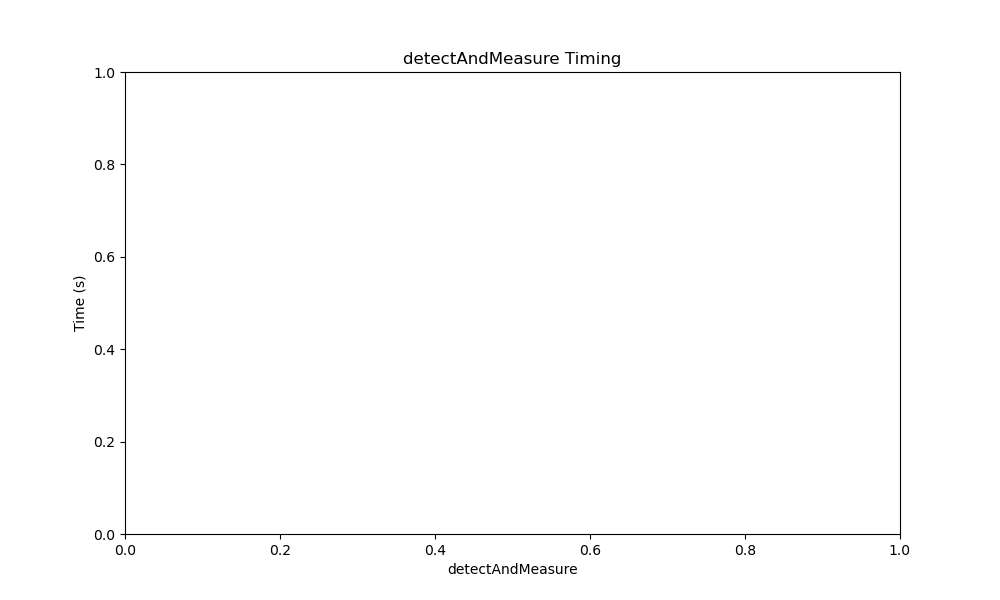

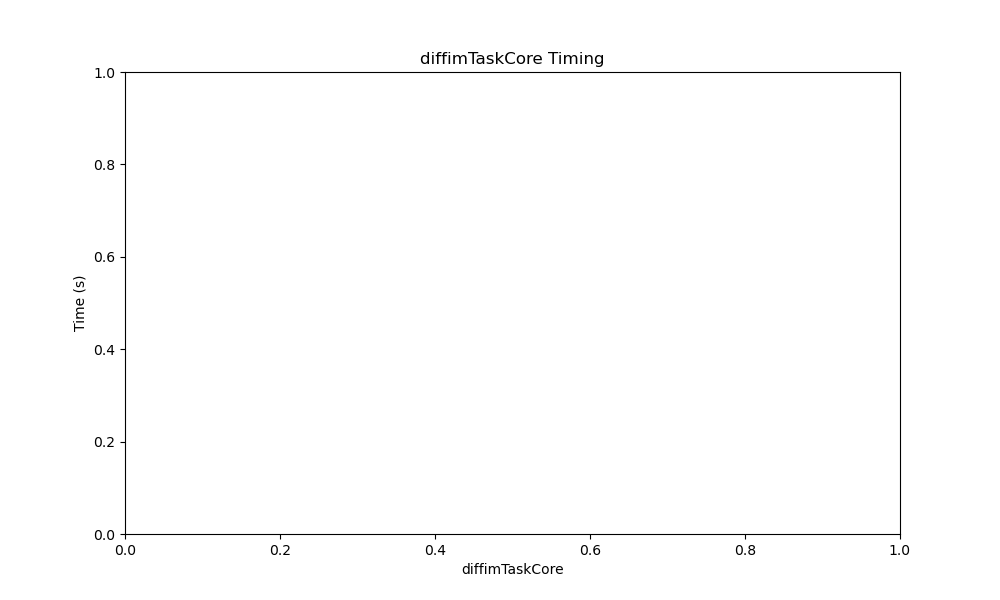

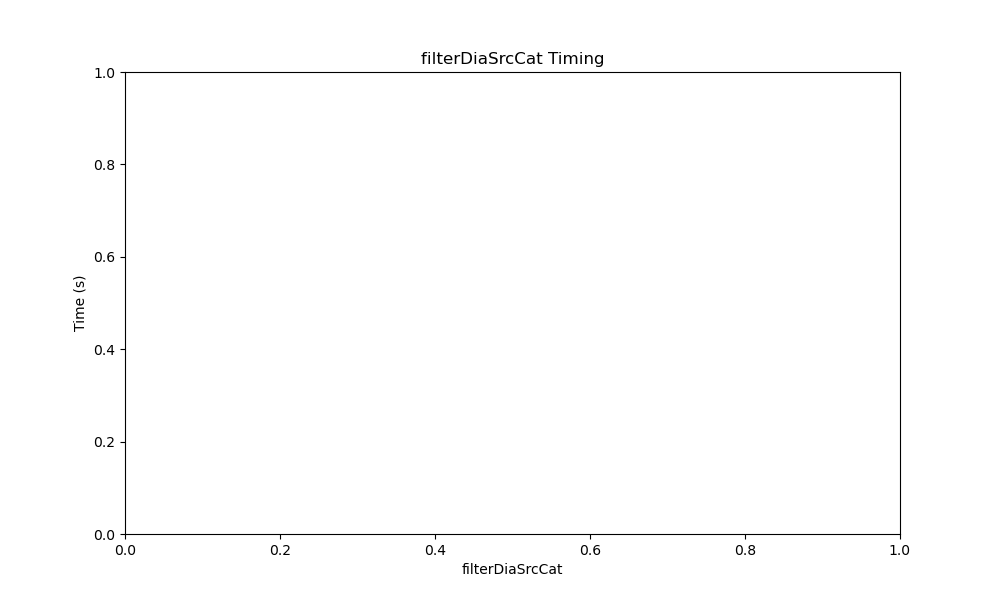

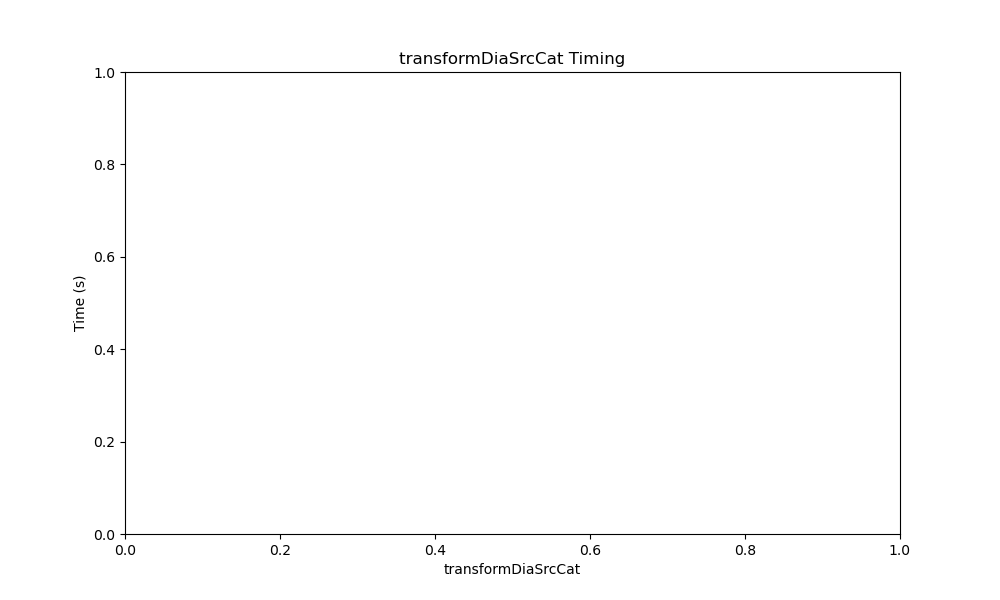

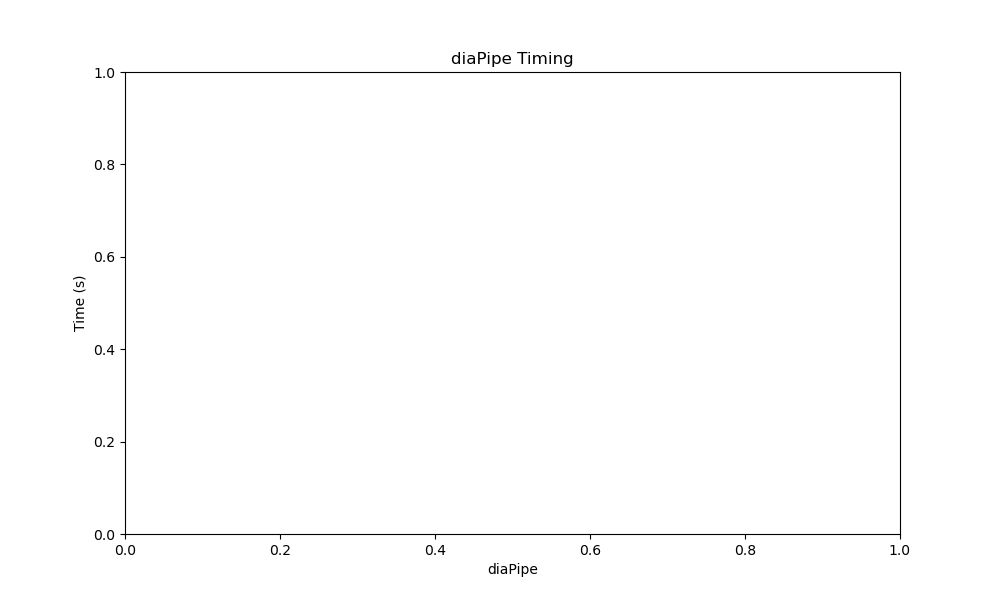

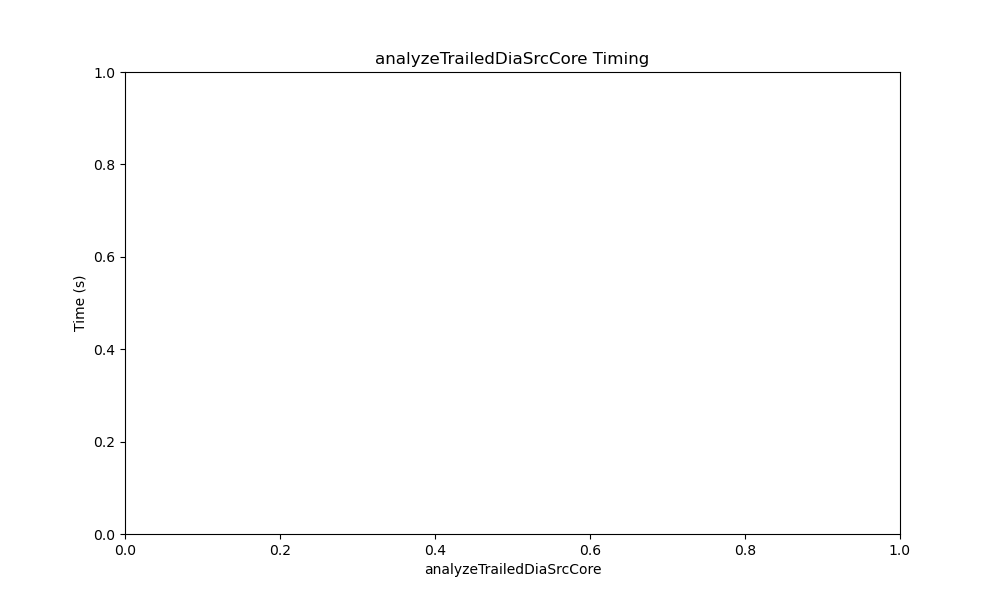

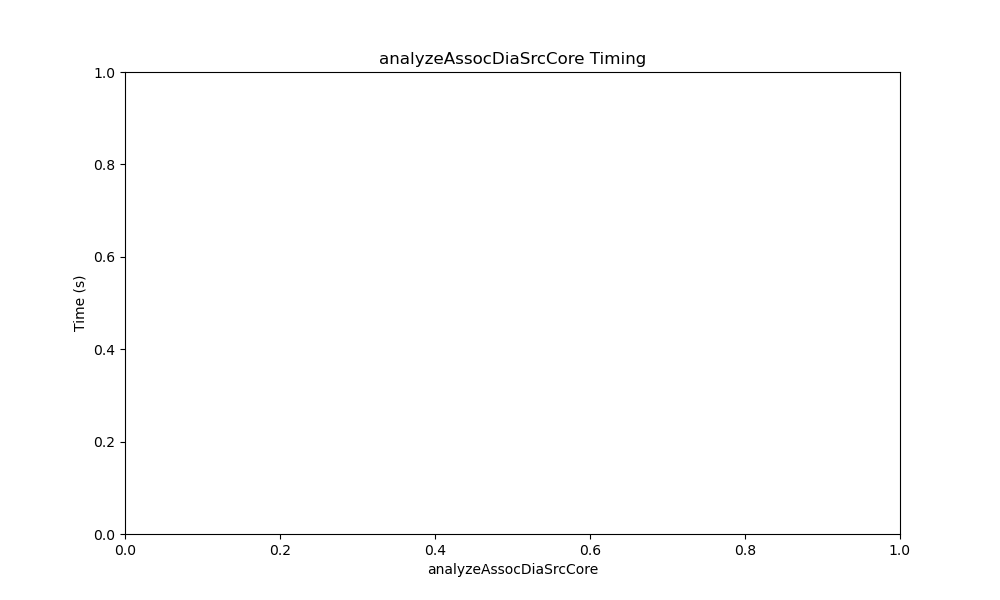

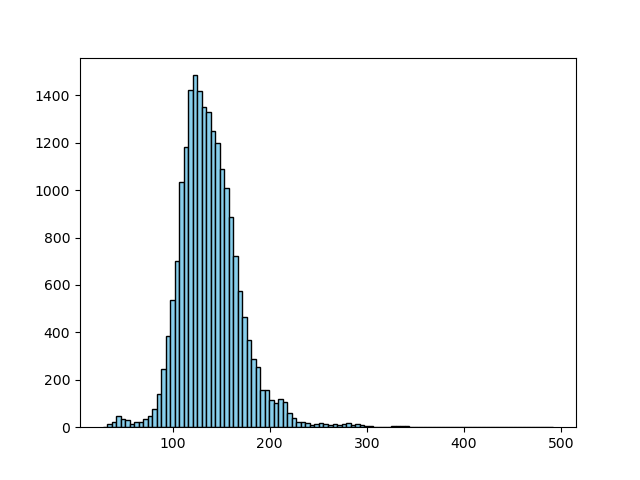

In [5]:
for job in jobs:
    # Plotting a basic histogram
    mask = (timingTable['job'] == job)
    data = timingTable[mask]
    plt.hist(data['timing'], bins=100, color='skyblue', edgecolor='black')
    plt.figure(figsize=(10,6))
     
    # Adding labels and title
    plt.xlabel(f'{job}')
    plt.ylabel('Time (s)')
    plt.title(f'{job} Timing')
     
    # Display the plot
    plt.show()

## 3. <a id="section_2">Analysis Tools Metrics</a>

In [6]:
datasetTypes = ['assocDiaSrcCore_metrics', 'diffimMetadata_metrics',
                'initialPviSummary_metrics', 'trailedDiaSrcCore_metrics']